<a href="https://colab.research.google.com/github/ihatepros236/Skin-Diseases-Detection-Using-Neural-Networks-and-other-ML-Techniques/blob/main/Dermascopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile
import os

# This will prompt for authorization.
drive.mount('/content/drive')

# Make sure the drive is mounted
if not os.path.isdir('/content/drive'):
    print("Drive not mounted. Please mount the drive.")

# Provide the exact path to the zip file
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/Cancer.zip'

# Destination folder where contents will be extracted
# Make sure this folder exists
extracted_folder = '/content/drive/MyDrive/Colab Notebooks/Cancerdata'

# Check if the extracted_folder already contains the unzipped data. If not, proceed with unzipping
if not os.path.exists(extracted_folder):
    os.makedirs(extracted_folder)

# If the data has already been extracted, you can skip this step
if not os.listdir(extracted_folder):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents of zip file in current directory
        zip_ref.extractall(extracted_folder)
    print("Files extracted")
else:
    print("Data already extracted")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files extracted


In [ ]:
!cp -r '/content/drive/MyDrive/Colab Notebooks/Cancerdata' '/content/Cancerdata'


In [ ]:
import pandas as pd
import os

# Path to the extracted data folder
data_folder = '/content/Cancerdata'

# CSV file path
csv_file_path = os.path.join(data_folder, '/content/Cancerdata/HAM10000_metadata.csv')

# Load the metadata into a pandas DataFrame
metadata = pd.read_csv(csv_file_path)

# Print the first few rows to make sure it's loaded correctly
print(metadata.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [ ]:
from glob import glob

# Base directories of your images
image_dir1 = os.path.join(data_folder, 'HAM10000_images_part_1')
image_dir2 = os.path.join(data_folder, 'HAM10000_images_part_2')

# Dictionary to map image IDs to their corresponding file paths
imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join(image_dir1, '*.jpg')) + glob(os.path.join(image_dir2, '*.jpg'))
}

# Confirm that the directories exist
print(os.path.exists(image_dir1))
print(os.path.exists(image_dir2))

# List a few files in the directories
print(os.listdir(image_dir1)[:5])  # Print first 5 files in directory 1
print(os.listdir(image_dir2)[:5])  # Print first 5 files in directory 2



True
True
['ISIC_0024771.jpg', 'ISIC_0028450.jpg', 'ISIC_0027523.jpg', 'ISIC_0026787.jpg', 'ISIC_0027601.jpg']
['ISIC_0033416.jpg', 'ISIC_0031333.jpg', 'ISIC_0032566.jpg', 'ISIC_0030788.jpg', 'ISIC_0033986.jpg']


In [ ]:
# Map the image IDs in the DataFrame to their paths using the dictionary we created earlier
metadata['path'] = metadata['image_id'].map(imageid_path_dict.get)

# Print the first few rows to confirm
print(metadata.head())


     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  
0  /content/Cancerdata/HAM10000_images_part_1/ISI...  
1  /content/Cancerdata/HAM10000_images_part_1/ISI...  
2  /content/Cancerdata/HAM10000_images_part_1/ISI...  
3  /content/Cancerdata/HAM10000_images_part_1/ISI...  
4  /content/Cancerdata/HAM10000_images_part_2/ISI...  


In [ ]:
print(metadata.isnull().sum())
# Fill missing 'age' values with median
metadata['age'].fillna(metadata['age'].median(), inplace=True)



lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
path             0
dtype: int64
lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
path            0
dtype: int64


In [ ]:
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np


# Size to resize our images to
img_width, img_height = 150, 150

# Initialize empty lists to hold our images and labels
images = []
labels = []

# Loop over the DataFrame, load each image, resize it, convert it to array, and append it to images
for index, row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
    img = load_img(row['path'], target_size=(img_width, img_height))
    img = img_to_array(img)
    images.append(img)

    # Append the label to labels
    labels.append(row['dx'])

# Convert images list to array
images = np.array(images)
images = images / 255
# Use LabelEncoder to convert labels to numerical values
le = LabelEncoder()
labels = le.fit_transform(labels)

# Use to_categorical to one-hot encode labels
labels = to_categorical(labels)


100%|██████████| 10015/10015 [00:56<00:00, 176.58it/s]


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(images, labels, test_size=0.08, stratify=labels, random_state=42)

# From the remaining data, we will split again into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.076, stratify=y_temp, random_state=42)

print(f"Train data shape: {X_train.shape} - {y_train.shape}")
print(f"Validation data shape: {X_val.shape} - {y_val.shape}")
print(f"Test data shape: {X_test.shape} - {y_test.shape}")


Train data shape: (8512, 150, 150, 3) - (8512, 7)
Validation data shape: (701, 150, 150, 3) - (701, 7)
Test data shape: (802, 150, 150, 3) - (802, 7)


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np


# Define your data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,       # randomly rotate images in the range
    width_shift_range=0.2,   # randomly shift images horizontally
    height_shift_range=0.2,  # randomly shift images vertically
    horizontal_flip=True,    # randomly flip images
    zoom_range=0.1

)

val_datagen = ImageDataGenerator()

# Initialize the model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Define optimizer
optimizer = tf.keras.optimizers.legacy.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0, amsgrad=False)


model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Specify where to save the model with the best validation accuracy.
model_checkpoint_callback = ModelCheckpoint(
    filepath="best_model.hdf5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Fit the model
model.fit(
    train_datagen.flow(X_train, y_train, batch_size=400),
    steps_per_epoch=len(X_train) // 400,
    epochs=20,
    validation_data=val_datagen.flow(X_val, y_val, batch_size=400),
    validation_steps=len(X_val) // 400,
    callbacks=[model_checkpoint_callback]  # Add the callbacks here
)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
21/21 [==============================] - 42s 2s/step - loss: 12.1272 - accuracy: 0.5867 - val_loss: 1.8862 - val_accuracy: 0.6250
Epoch 2/20
21/21 [==============================] - 39s 2s/step - loss: 1.3806 - accuracy: 0.6864 - val_loss: 0.9423 - val_accuracy: 0.7300
Epoch 3/20
21/21 [==============================] - 38s 2s/step - loss: 0.9411 - accuracy: 0.7157 - val_loss: 0.8940 - val_accuracy: 0.7150
Epoch 4/20
21/21 [==============================] - 38s 2s/step - loss: 0.8638 - accuracy: 0.7263 - val_loss: 0.8831 - val_accuracy: 0.7125
Epoch 5/20
21/21 [==============================] - 38s 2s/step - loss: 0.8642 - accuracy: 0.7225 - val_loss: 0.9186 - val_accuracy: 0.7300
Epoch 6/20
21/21 [==============================] - 39s 2s/step - loss: 0.8095 - accuracy: 0.7395 - val_loss: 0.8418 - val_accuracy: 0.7375
Epoch 7/20
21/21 [==============================] - 38s 2s/step - loss: 0.7858 - accuracy: 0.7398 - val_loss: 0.8543 - val_accuracy: 0.7300
Epoch 8/20
21/21 [=

In [ ]:
# Continue training the model for 5 more epochs
model.fit(
    train_datagen.flow(X_train, y_train, batch_size=400),
    steps_per_epoch=len(X_train) // 400,
    epochs=5,
    validation_data=val_datagen.flow(X_val, y_val, batch_size=400),
    validation_steps=len(X_val) // 400,
    callbacks=[model_checkpoint_callback]  # Add the callbacks here
)


Epoch 1/5
21/21 [==============================] - 40s 2s/step - loss: 0.6557 - accuracy: 0.7818 - val_loss: 0.7378 - val_accuracy: 0.7675
Epoch 2/5
21/21 [==============================] - 38s 2s/step - loss: 0.6312 - accuracy: 0.7813 - val_loss: 0.8318 - val_accuracy: 0.7200
Epoch 3/5
21/21 [==============================] - 38s 2s/step - loss: 0.6376 - accuracy: 0.7807 - val_loss: 0.8201 - val_accuracy: 0.7450
Epoch 4/5
21/21 [==============================] - 38s 2s/step - loss: 0.6438 - accuracy: 0.7774 - val_loss: 0.7903 - val_accuracy: 0.7300
Epoch 5/5
21/21 [==============================] - 38s 2s/step - loss: 0.6322 - accuracy: 0.7754 - val_loss: 0.7717 - val_accuracy: 0.7300


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
best_model = load_model("best_model.hdf5")

# Evaluate the model
loss, accuracy = best_model.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)



26/26 [==============================] - 1s 15ms/step - loss: 0.8169 - accuracy: 0.7244
Loss:  0.8169062733650208
Accuracy:  0.7244389057159424


26/26 [==============================] - 0s 10ms/step


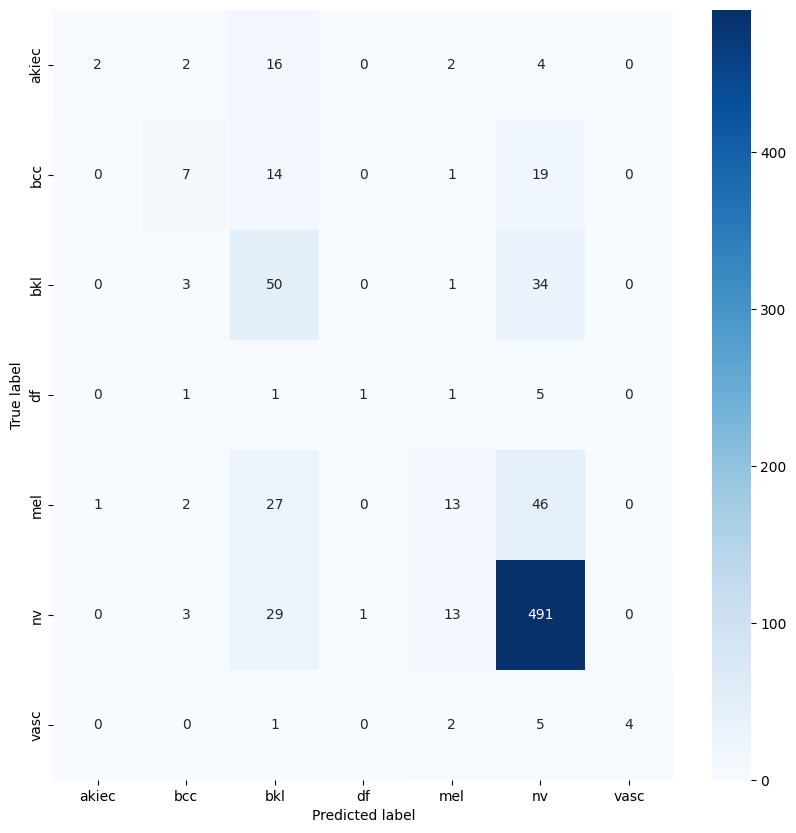

              precision    recall  f1-score   support

       akiec       0.67      0.08      0.14        26
         bcc       0.39      0.17      0.24        41
         bkl       0.36      0.57      0.44        88
          df       0.50      0.11      0.18         9
         mel       0.39      0.15      0.21        89
          nv       0.81      0.91      0.86       537
        vasc       1.00      0.33      0.50        12

    accuracy                           0.71       802
   macro avg       0.59      0.33      0.37       802
weighted avg       0.69      0.71      0.67       802



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import argmax

# Predict classes
y_pred = model.predict(X_test)
# Convert predicted class probabilities to class labels
y_pred_classes = argmax(y_pred, axis=1)

# Convert one-hot encoded y_test to class labels
y_test_classes = argmax(y_test, axis=1)

# Use LabelEncoder object 'le' to convert class labels back to original labels
class_names = list(le.classes_)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Generate classification report
cr = classification_report(y_test_classes, y_pred_classes, target_names=class_names)
print(cr)


In [ ]:

import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator()

# Load the pre-trained DenseNet-121 model (weights pre-trained on ImageNet)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze some layers in the base model
num_layers_to_freeze = 95
for layer in base_model.layers[:num_layers_to_freeze]:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = BatchNormalization()(x)
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Learning Rate Scheduler
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,   # Adjust decay_steps
    decay_rate=0.9       # Adjust decay_rate
)
optimizer = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Specify where to save the model with the best validation accuracy.
model_checkpoint_callback = ModelCheckpoint(
    filepath="best_model.hdf5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Fit the model
epochs = 30
batch_size = 200
model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=val_datagen.flow(X_val, y_val, batch_size=batch_size),
    validation_steps=len(X_val) // batch_size,
    callbacks=[model_checkpoint_callback]  # Add the callbacks here
)


29084464/29084464 [==============================] - 2s 0us/step
Epoch 1/30
42/42 [==============================] - 103s 1s/step - loss: 4.3821 - accuracy: 0.6847 - val_loss: 3.5988 - val_accuracy: 0.7283
Epoch 2/30
42/42 [==============================] - 40s 949ms/step - loss: 2.6718 - accuracy: 0.8000 - val_loss: 2.6703 - val_accuracy: 0.7433
Epoch 3/30
42/42 [==============================] - 40s 940ms/step - loss: 1.9149 - accuracy: 0.8317 - val_loss: 2.3970 - val_accuracy: 0.7617
Epoch 4/30
42/42 [==============================] - 40s 946ms/step - loss: 1.4492 - accuracy: 0.8624 - val_loss: 1.9562 - val_accuracy: 0.7767
Epoch 5/30
42/42 [==============================] - 40s 957ms/step - loss: 1.1530 - accuracy: 0.8827 - val_loss: 1.5481 - val_accuracy: 0.7833
Epoch 6/30
42/42 [==============================] - 40s 955ms/step - loss: 0.9228 - accuracy: 0.8999 - val_loss: 1.2909 - val_accuracy: 0.7900
Epoch 7/30
42/42 [==============================] - 39s 919ms/step - loss: 0.75

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
best_model1 = load_model("best_model.hdf5")

# Evaluate the model
loss, accuracy = best_model1.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

OSError: ignored

26/26 [==============================] - 0s 13ms/step


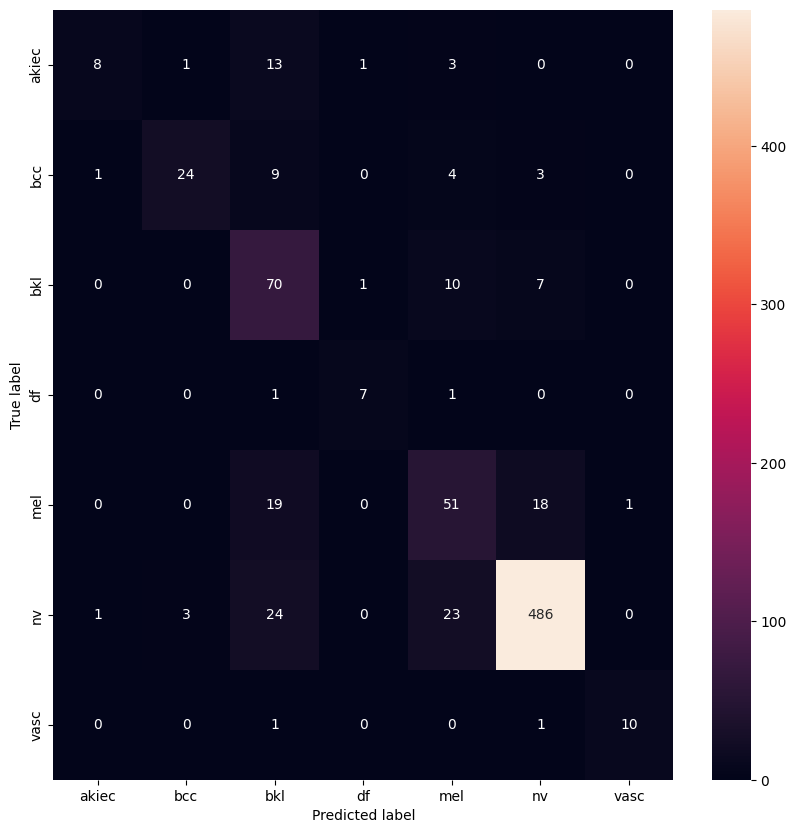

              precision    recall  f1-score   support

       akiec       0.80      0.31      0.44        26
         bcc       0.86      0.59      0.70        41
         bkl       0.51      0.80      0.62        88
          df       0.78      0.78      0.78         9
         mel       0.55      0.57      0.56        89
          nv       0.94      0.91      0.92       537
        vasc       0.91      0.83      0.87        12

    accuracy                           0.82       802
   macro avg       0.76      0.68      0.70       802
weighted avg       0.84      0.82      0.82       802



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import argmax

# Predict classes
y_pred = model.predict(X_test)
# Convert predicted class probabilities to class labels
y_pred_classes = argmax(y_pred, axis=1)

# Convert one-hot encoded y_test to class labels
y_test_classes = argmax(y_test, axis=1)

# Use LabelEncoder object 'le' to convert class labels back to original labels
class_names = list(le.classes_)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Generate classification report
cr = classification_report(y_test_classes, y_pred_classes, target_names=class_names)
print(cr)
